# Capstone Project: The Efficacy of Multilayer Perceptron Algorithms in Predicting Bankruptcy, The Models

## Table of Contents

<ul>
<li><a href="#DISCLOSURE">DISCLOSURE</a></li>
<li><a href="#introduction">INTRODUCTION</a></li>
<li><a href="#Benchmark Logistic Regression">Benchmark Logistic Regression</a></li>
<li><a href="#MLP Model">MLP Model</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='DISCLOSURE'></a>
## DISCLOSURE
Please note, that this notebook, "bankruptcy-model.ipynb" ONLY COVERS the modeling of the data. Simply, the jupyter notebook, "bankruptcy-data.ipynb" was too big to include the models.

<a id='introduction'></a>
## INTRODUCTION
This part of the analyis loads the preprocessed data: a dataset with no null values ("No Nulls"), a dataset with imputed null values ("Nulls Only'), a dataset that has a dummy variable for each feature variable that signals whether a value in the feature column is null ("One Hot"), and a dataset with imputed null values and a variable that counts the number of null values in a given row of data ("Sum"). Logistic regression models are applied to these four datasets as the benchmark models. Next, Multi Layer Perceptron (MLP) models are made for the four datasets. The AUC scores are calculated for all the models. The conclusion compares the AUC scores of the MLP models to the Logistic Regression models, and offers additional insight into these models.

<a id='Benchmark Logistic Regression'></a>
## Benchmark Logistic Regression
Logistic regression servers as a good benchmark model for predicting bankruptcies. It's a basic model that analyzes a binary target variable (bankrupt vs not bankrupt).

In [402]:
# This imports the necessary libraries for the logistic regression models.
from sklearn.linear_model import LogisticRegression

# This imports the AUC score for scoring the models.
# This comes from Reference 27 in References.
from sklearn.metrics import roc_auc_score

# These are libraries that will be needed to organize data,
# graph data, and change the working directory.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


### Load Data: No Nulls

In [403]:
# This loads the no_nulls X training and testing data
# from the CSVs and converts the data to np.arrays.
Xtrain_nonulls = pd.read_csv('no-peaking/Xtrain_nonulls.csv')
Xtrain_nonulls = np.array(Xtrain_nonulls)
Xtest_nonulls = pd.read_csv('no-peaking/Xtest_nonulls.csv')
Xtest_nonulls = np.array(Xtest_nonulls)

# This loads the no_nulls Y training and tesing data
# from the CSVs. It also ravels the y_data, so only 
# rows are shown, not columns.
Ytrain_nonulls = pd.read_csv('no-peaking/Ytrain_nonulls.csv')
Ytrain_nonulls = np.array(Ytrain_nonulls)
Ytrain_nonulls = Ytrain_nonulls.ravel() 
Ytest_nonulls = pd.read_csv('no-peaking/Ytest_nonulls.csv')
Ytest_nonulls = np.array(Ytest_nonulls)
Ytest_nonulls = Ytest_nonulls.ravel()

### Performing Hold-out Cross-Validation on just the training set
K-fold Cross-Validation is a standard method for preventing a logistic regression model from overfitting. However, because the testing set, the fifth year of the dataset, is arbitrarily chosen (not random), K-fold Cross-Validation cannot be applied to the dataset (Reference 3). K-fold Cross-Validation would corrupt the testing set with data leakage considering that the dataset is a time-series set (Reference 3). To prevent data leakage, Hold-out cross-Validation will only be applied to the training set (References 3 & 4). Hold-out Cross-Validation takes a percentage of the training set as a validation set to test the accuracy of the model during the training stage. This method of cross validation, like all methods, is used to prevent the overfitting of a model and poor accuracy performance when applying the testing data to the fitted model (Reference 3).

### No Nulls Logistic Regression Benchmark

In [404]:
# This import train_test_split from sklearn.
from sklearn.model_selection import train_test_split

In [405]:
# This creates the hold-out validation set for the logistic regression model
# for the No Nulls dataset.
# This comes from Reference 4 in References.
Xtrain_nonulls, Xval_nonulls, Ytrain_nonulls, Yval_nonulls = train_test_split(
                    Xtrain_nonulls, Ytrain_nonulls, test_size = 0.2, random_state = 13)

In [406]:
# This creates the logistic regression model for the No Nulls Dataset.
log_nonulls = LogisticRegression(penalty='l2', max_iter=1000)

# This fits the log_nonulls model with the training data.
log_nonulls.fit(Xtrain_nonulls,Ytrain_nonulls)

# This predicts the y values from the Xval dataset.
yval_pred_nonulls = log_nonulls.predict(Xval_nonulls)

# This returns the validation AUC score.
VAL_auc_nonulls = roc_auc_score(Yval_nonulls, yval_pred_nonulls)
VAL_auc_nonulls

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8493093121316346

In [407]:
# This tests the model, built on the training data, with the
# testing data from year 5.
ytest_pred_nonulls = log_nonulls.predict(Xtest_nonulls)
TEST_auc_nonulls = roc_auc_score(Ytest_nonulls, ytest_pred_nonulls)
print("The AUC score for the model is %.4f." % TEST_auc_nonulls)

The AUC score for the model is 0.3675.


### Load Data: Nulls only

In [408]:
# This loads the Nulls only training and testing data
# from the CSVs and converts the data to np.arrays.
Xtrain_nullsonly = pd.read_csv('no-peaking/Xtrain_sum.csv')
Xtrain_nullsonly = Xtrain_nullsonly.drop(
    Xtrain_nullsonly.columns[64], axis=1)
Xtrain_nullsonly = np.array(Xtrain_nullsonly)
Xtest_nullsonly = pd.read_csv('no-peaking/Xtest_sum.csv')
Xtest_nullsonly = Xtest_nullsonly.drop(
    Xtest_nullsonly.columns[64], axis=1)
Xtest_nullsonly = np.array(Xtest_nullsonly)

# This loads the Nulls only Y training and tesing data
# from the CSVs. It also ravels the y_data, so only 
# rows are shown, not columns.
Ytrain_nullsonly = pd.read_csv('no-peaking/Ytrain_sum.csv')
Ytrain_nullsonly = np.array(Ytrain_nullsonly)
Ytrain_nullsonly = Ytrain_nullsonly.ravel() 
Ytest_nullsonly = pd.read_csv('no-peaking/Ytest_sum.csv')
Ytest_nullsonly = np.array(Ytest_nullsonly)
Ytest_nullsonly = Ytest_nullsonly.ravel()

### Nulls Only Logistic Regression Benchmark

In [409]:
# This creates the hold-out validation set for the logistic regression model
# for the Nulls Only dataset.
# This comes from Reference 4 in References.
Xtrain_nullsonly, Xval_nullsonly, Ytrain_nullsonly, Yval_nullsonly = train_test_split(
                    Xtrain_nullsonly, Ytrain_nullsonly, test_size = 0.2, random_state = 13)

In [410]:
# This creates the logistic regression model for the Nulls Only Dataset.
log_nullsonly = LogisticRegression(penalty='l2', max_iter=1000)

# This fits the Log_nullsonly model with the training data.
log_nullsonly.fit(Xtrain_nullsonly,Ytrain_nullsonly)

# This predicts the y values from the Xval dataset.
yval_pred_nullsonly = log_nullsonly.predict(Xval_nullsonly)

# This returns the validation AUC score.
VAL_auc_nullsonly = roc_auc_score(Yval_nullsonly, yval_pred_nullsonly)
VAL_auc_nullsonly

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7335101563282769

In [421]:
# This tests the model, built on the training data, with the
# testing data from year 5.
ytest_pred_nullsonly = log_nullsonly.predict(Xtest_nullsonly)
TEST_auc_nullsonly = roc_auc_score(Ytest_nullsonly, ytest_pred_nullsonly)
print("The AUC score for the model is %.4f." % TEST_auc_nullsonly)

The AUC score for the model is 0.6903.


### Load Data: Onehot

In [412]:
# This loads the one hot X training and testing data
# from the CSVs and converts the data to np.arrays.
Xtrain_onehot = pd.read_csv('no-peaking/Xtrain_onehot.csv')
Xtrain_onehot = np.array(Xtrain_onehot)
Xtest_onehot = pd.read_csv('no-peaking/Xtest_onehot.csv')
Xtest_onehot = np.array(Xtest_onehot)

# This loads the one hot Y training and tesing data
# from the CSVs. It also ravels the y_data, so only 
# rows are shown, not columns.
Ytrain_onehot = pd.read_csv('no-peaking/Ytrain_onehot.csv')
Ytrain_onehot = np.array(Ytrain_onehot)
Ytrain_onehot = Ytrain_onehot.ravel() 
Ytest_onehot = pd.read_csv('no-peaking/Ytest_onehot.csv')
Ytest_onehot = np.array(Ytest_onehot)
Ytest_onehot = Ytest_onehot.ravel()

### One Hot Logistic Regression Benchmark

In [413]:
# This creates the hold-out validation set for the logistic regression model
# for the One Hot dataset.
# This comes from Reference 4 in References.
Xtrain_onehot, Xval_onehot, Ytrain_onehot, Yval_onehot = train_test_split(
                    Xtrain_onehot, Ytrain_onehot, test_size = 0.2, random_state = 13)

In [414]:
# This creates the logistic regression model for the One Hot Dataset.
log_onehot = LogisticRegression(penalty='l2', max_iter=1000)

# This fits the log_onehot model with the training data.
log_onehot.fit(Xtrain_onehot,Ytrain_onehot)

# This predicts the y values from the Xval dataset.
yval_pred_onehot = log_onehot.predict(Xval_onehot)

# This returns the validation AUC score.
VAL_auc_onehot = roc_auc_score(Yval_onehot, yval_pred_onehot)
VAL_auc_onehot

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.866889447207181

In [415]:
# This tests the model, built on the training data, with the
# testing data from year 5.
ytest_pred_onehot = log_onehot.predict(Xtest_onehot)
TEST_auc_onehot = roc_auc_score(Ytest_onehot, ytest_pred_onehot)
print("The AUC score for the model is %.4f." % TEST_auc_onehot)

The AUC score for the model is 0.6872.


### Load Data: Sum

In [416]:
# This loads the SUM X training and testing data
# from the CSVs and converts the data to np.arrays.
Xtrain_sum = pd.read_csv('no-peaking/Xtrain_sum.csv')
Xtrain_sum = np.array(Xtrain_sum)
Xtest_sum = pd.read_csv('no-peaking/Xtest_sum.csv')
Xtest_sum = np.array(Xtest_sum)

# This loads the SUM Y training and tesing data
# from the CSVs. It also ravels the y_data, so only 
# rows are shown, not columns.
Ytrain_sum = pd.read_csv('no-peaking/Ytrain_sum.csv')
Ytrain_sum = np.array(Ytrain_sum)
Ytrain_sum = Ytrain_sum.ravel() 
Ytest_sum = pd.read_csv('no-peaking/Ytest_sum.csv')
Ytest_sum = np.array(Ytest_sum)
Ytest_sum = Ytest_sum.ravel()

### Sum Logistic Regression Benchmark

In [417]:
# This creates the hold-out validation set for the logistic regression model
# for the Sum dataset.
# This comes from Reference 4 in References.
Xtrain_sum, Xval_sum, Ytrain_sum, Yval_sum = train_test_split(
                    Xtrain_sum, Ytrain_sum, test_size = 0.2, random_state = 13)

In [418]:
# This creates the logistic regression model for the Sum Dataset.
log_sum = LogisticRegression(penalty='l2', max_iter=1000)

# This fits the log_sun model with the training data.
log_sum.fit(Xtrain_sum,Ytrain_sum)

# This predicts the y values from the Xval dataset.c
yval_pred_sum = log_sum.predict(Xval_sum)

# This returns the validation AUC score.
VAL_auc_sum = roc_auc_score(Yval_sum, yval_pred_sum)
VAL_auc_sum

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7454176998689093

In [419]:
# This tests the model, built on the training data, with the
# testing data from year 5.
ytest_pred_sum = log_sum.predict(Xtest_sum)
TEST_auc_sum = roc_auc_score(Ytest_sum, ytest_pred_sum)
print("The AUC score for the model is %.4f." % TEST_auc_sum)

The AUC score for the model is 0.6822.


<a id='MLP Model'></a>
## MLP Model

## MLP Model No Nulls

In [102]:
# This creates a directory to save the best models for the MLP.
os.mkdir('saved_models')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'saved_models'

In [350]:
# This imports the necessary libraries for the MLP.

# This imports the sequential model, the layers,
# the SGD optimizer, the regularizers from keras.
# This comes from Reference 5 in Referenes.
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Nadam
from keras import regularizers

# This imports checkpointer, which records the best weights
# for the algorithm.
# This comes from Reference 6 in References.
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [351]:
# This sets the random seeds for reproducible results.
# This comes from reference 10 of references.
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)


In [352]:
def build_model(drop_rate, l2_factor, first_dense, second_dense,
                third_dense, hidden_act, out_act, x):
    dim_int = int(np.size(x,1))
    # This defines the model as a sequential model.
    # This comes from References 1 in References.
    model = Sequential()

    # This is the input layer.
    # This comes from References 1 & 3 in References.
    model.add(Dense(first_dense, activation = hidden_act,
        kernel_regularizer = regularizers.l2(l2_factor),
        input_dim = dim_int))
    model.add(Dropout(drop_rate))

    # This creates the first hidden layer.
    # This comes from Reference 7 in References.
    model.add(Dense(second_dense,
        activation = hidden_act,
        kernel_regularizer = regularizers.l2(l2_factor)))
    model.add(Dropout(drop_rate))
    
    # This creates the second hidden layer.
    # This comes from Reference 7 in References.
    model.add(Dense(third_dense,
        activation = hidden_act,
        kernel_regularizer = regularizers.l2(l2_factor)))
    model.add(Dropout(drop_rate))

    # This creates the output layer.
    # This comes from Reference 7 in References.
    model.add(Dense(1, activation=out_act))
    # This returns the model.
    return model

In [353]:
# This comes from Reference 7 in References.
n_epochs = 100
size_of_batch = 50
stochastic = SGD(lr=0.001)
nad = Nadam()
RMS = RMSprop()

# This builds the MLP model for No NULLS.
mlp_nonulls = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                             first_dense=32,
                             second_dense=16,
                             third_dense=8,
                            hidden_act='relu',
                            out_act='sigmoid',
                            x=Xtrain_nonulls)

In [354]:
# This compiles the MLP model for the No Nulls data.
# This comes from Reference 13 in References.
mlp_nonulls.compile(loss='binary_crossentropy',
              optimizer= stochastic,
              metrics=['accuracy'])

In [355]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 6 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.mlp_nonulls.hdf5',
                             verbose=1, save_best_only=True)

In [356]:
# This fits the model and runs it for 100 epochs.
mlp_nonulls.fit(Xtrain_nonulls, Ytrain_nonulls, validation_split=0.20,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = [checkpoint], verbose=1)

Train on 11018 samples, validate on 2755 samples
Epoch 1/100
11018/11018 [==============================] - 5s 427us/step - loss: 0.8007 - acc: 0.5077 - val_loss: 0.7505 - val_acc: 0.6650

Epoch 00001: val_loss improved from inf to 0.75053, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 2/100
11018/11018 [==============================] - 1s 85us/step - loss: 0.7898 - acc: 0.5230 - val_loss: 0.7485 - val_acc: 0.6650

Epoch 00002: val_loss improved from 0.75053 to 0.74853, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 3/100
11018/11018 [==============================] - 1s 86us/step - loss: 0.7858 - acc: 0.5197 - val_loss: 0.7468 - val_acc: 0.6613

Epoch 00003: val_loss improved from 0.74853 to 0.74682, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 4/100
11018/11018 [==============================] - 1s 97us/step - loss: 0.7775 - acc: 0.5286 - val_loss: 0.7451 - val_acc: 0.6584

Epoch 00004: val_loss improved from 0.74682 to 0.7451

Epoch 33/100
11018/11018 [==============================] - 1s 81us/step - loss: 0.7302 - acc: 0.5926 - val_loss: 0.7031 - val_acc: 0.7416

Epoch 00033: val_loss improved from 0.70500 to 0.70313, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 34/100
11018/11018 [==============================] - 1s 83us/step - loss: 0.7316 - acc: 0.5870 - val_loss: 0.7012 - val_acc: 0.7441

Epoch 00034: val_loss improved from 0.70313 to 0.70124, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 35/100
11018/11018 [==============================] - 1s 81us/step - loss: 0.7206 - acc: 0.5869 - val_loss: 0.6993 - val_acc: 0.7445

Epoch 00035: val_loss improved from 0.70124 to 0.69934, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 36/100
11018/11018 [==============================] - 1s 82us/step - loss: 0.7343 - acc: 0.5843 - val_loss: 0.6982 - val_acc: 0.7448

Epoch 00036: val_loss improved from 0.69934 to 0.69818, saving model to saved_models/weights.be

11018/11018 [==============================] - 1s 96us/step - loss: 0.6510 - acc: 0.6930 - val_loss: 0.6000 - val_acc: 0.7702

Epoch 00097: val_loss improved from 0.60143 to 0.60004, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 98/100
11018/11018 [==============================] - 1s 96us/step - loss: 0.6537 - acc: 0.6928 - val_loss: 0.5988 - val_acc: 0.7706

Epoch 00098: val_loss improved from 0.60004 to 0.59875, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 99/100
11018/11018 [==============================] - 1s 91us/step - loss: 0.6528 - acc: 0.6977 - val_loss: 0.5976 - val_acc: 0.7710

Epoch 00099: val_loss improved from 0.59875 to 0.59755, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 100/100
11018/11018 [==============================] - 1s 97us/step - loss: 0.6548 - acc: 0.6936 - val_loss: 0.5964 - val_acc: 0.7717

Epoch 00100: val_loss improved from 0.59755 to 0.59645, saving model to saved_models/weights.best.mlp_nonul

In [357]:
# This loads the best weights from the model.
# This comes from Reference 6 in References.
mlp_nonulls.load_weights('saved_models/weights.best.mlp_nonulls.hdf5')

In [358]:
# This prints the accuracy of the model.
# This comes from Reference 9 in References.
score = mlp_nonulls.evaluate(Xtest_nonulls, Ytest_nonulls, verbose=0)
accuracy = 100*score[1]
print('Test acuracy: %.4f%%' %accuracy)

Test acuracy: 85.5092%


In [359]:
# This prints the AUC score for the model.
Ypred_nonulls = mlp_nonulls.predict(Xtest_nonulls)
mlp_nonulls_ROC = roc_auc_score(Ytest_nonulls, Ypred_nonulls)
print("The AUC score for the model is %.4f." % mlp_nonulls_ROC)

The AUC score for the model is 0.5504.


In [438]:
# This imports the necessary library for the ROC Curve.
from sklearn import metrics

def roc_plot(model, x_test, y_test, title):
    '''
    This function plots ROC curves. It takes in
    the model, title, x_test, y_test as arguments.
    '''
    # This sets the size of the plot
    # This comes from Reference 12 in References
    plt.figure(figsize=(6.0,6.0))
    
    # This finds the predicted values of y from the x_test
    # data.
    # This comes from Reference 11 in References.
    pred_probs = model.predict_proba(x_test)
    
    # This finds the false and true positive rates for
    # the ROC Curve.
    # This comes from Reference 11 in References.
    fpr, tpr, _ = metrics.roc_curve(y_test, pred_probs)
    
    # This finds the AUC score.
    # This comes from Reference 11 in References.
    auc = metrics.roc_auc_score(y_test, pred_probs)
    auc = str(auc)
    auc = auc[0:6]
    
    # This plots the ROC Curve with the AUC label.
    plt.plot(fpr,tpr,label='auc: ' + auc)
    plt.legend(loc=4)
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

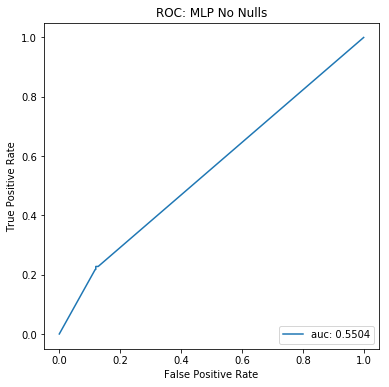

In [439]:
# This plots the ROC curve for the model.
roc_plot(model=mlp_nonulls, x_test=Xtest_nonulls,
        y_test=Ytest_nonulls,title="ROC: MLP No Nulls")

### MLP Model Nulls Only

In [360]:
# This comes from Reference 7 in References.
n_epochs = 100
size_of_batch = 50
stochastic = SGD(lr=0.001)
nad = Nadam()
RMS = RMSprop()

# This builds the MLP model for Nulls Only.
mlp_nullsonly = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                             first_dense=32,
                             second_dense=16,
                             third_dense=8,
                            hidden_act='relu',
                            out_act='sigmoid',
                            x=Xtrain_nullsonly)

In [361]:
# This compiles the MLP model for the Nulls Only data.
# This comes from Reference 13 in References.
mlp_nullsonly.compile(loss='binary_crossentropy',
              optimizer= stochastic,
              metrics=['accuracy'])

In [362]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 6 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.mlp_nullsonly.hdf5',
                             verbose=1, save_best_only=True)

In [363]:
# This fits the model and runs it for 100 epochs.
mlp_nullsonly.fit(Xtrain_nullsonly, Ytrain_nullsonly, validation_split=0.20,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = [checkpoint], verbose=1)

Train on 45858 samples, validate on 11465 samples
Epoch 1/100
45858/45858 [==============================] - 8s 169us/step - loss: 0.7686 - acc: 0.5644 - val_loss: 0.7395 - val_acc: 0.6666

Epoch 00001: val_loss improved from inf to 0.73955, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 2/100
45858/45858 [==============================] - 4s 91us/step - loss: 0.7558 - acc: 0.6195 - val_loss: 0.7317 - val_acc: 0.6829

Epoch 00002: val_loss improved from 0.73955 to 0.73169, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 3/100
45858/45858 [==============================] - 4s 92us/step - loss: 0.7489 - acc: 0.6370 - val_loss: 0.7235 - val_acc: 0.6867

Epoch 00003: val_loss improved from 0.73169 to 0.72352, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 4/100
45858/45858 [==============================] - 4s 93us/step - loss: 0.7402 - acc: 0.6434 - val_loss: 0.7162 - val_acc: 0.6903

Epoch 00004: val_loss improved from 0.72352 to

45858/45858 [==============================] - 4s 95us/step - loss: 0.6945 - acc: 0.6681 - val_loss: 0.6650 - val_acc: 0.6932

Epoch 00033: val_loss improved from 0.66549 to 0.66497, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 34/100
45858/45858 [==============================] - 5s 99us/step - loss: 0.6923 - acc: 0.6694 - val_loss: 0.6640 - val_acc: 0.6932

Epoch 00034: val_loss improved from 0.66497 to 0.66402, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 35/100
45858/45858 [==============================] - 5s 107us/step - loss: 0.6918 - acc: 0.6710 - val_loss: 0.6631 - val_acc: 0.6933

Epoch 00035: val_loss improved from 0.66402 to 0.66309, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 36/100
45858/45858 [==============================] - 5s 109us/step - loss: 0.6903 - acc: 0.6707 - val_loss: 0.6623 - val_acc: 0.6937

Epoch 00036: val_loss improved from 0.66309 to 0.66228, saving model to saved_models/weights.best.ml

45858/45858 [==============================] - 4s 93us/step - loss: 0.6728 - acc: 0.6797 - val_loss: 0.6422 - val_acc: 0.6966

Epoch 00065: val_loss improved from 0.64314 to 0.64221, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 66/100
45858/45858 [==============================] - 4s 94us/step - loss: 0.6718 - acc: 0.6789 - val_loss: 0.6417 - val_acc: 0.6965

Epoch 00066: val_loss improved from 0.64221 to 0.64165, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 67/100
45858/45858 [==============================] - 5s 108us/step - loss: 0.6718 - acc: 0.6778 - val_loss: 0.6410 - val_acc: 0.6966

Epoch 00067: val_loss improved from 0.64165 to 0.64100, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 68/100
45858/45858 [==============================] - 6s 135us/step - loss: 0.6721 - acc: 0.6779 - val_loss: 0.6404 - val_acc: 0.6968

Epoch 00068: val_loss improved from 0.64100 to 0.64041, saving model to saved_models/weights.best.ml

45858/45858 [==============================] - 4s 92us/step - loss: 0.6554 - acc: 0.6878 - val_loss: 0.6219 - val_acc: 0.7002

Epoch 00097: val_loss improved from 0.62262 to 0.62191, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 98/100
45858/45858 [==============================] - 4s 93us/step - loss: 0.6537 - acc: 0.6889 - val_loss: 0.6212 - val_acc: 0.7009

Epoch 00098: val_loss improved from 0.62191 to 0.62122, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 99/100
45858/45858 [==============================] - 4s 92us/step - loss: 0.6569 - acc: 0.6888 - val_loss: 0.6205 - val_acc: 0.7014

Epoch 00099: val_loss improved from 0.62122 to 0.62055, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 100/100
45858/45858 [==============================] - 5s 107us/step - loss: 0.6549 - acc: 0.6909 - val_loss: 0.6200 - val_acc: 0.7016

Epoch 00100: val_loss improved from 0.62055 to 0.61995, saving model to saved_models/weights.best.ml

In [364]:
# This loads the best weights from the model.
# This comes from Reference 6 in References.
mlp_nullsonly.load_weights('saved_models/weights.best.mlp_nullsonly.hdf5')

In [365]:
# This prints the accuracy of the model.
# This comes from Reference 9 in References.
score = mlp_nullsonly.evaluate(Xtest_nullsonly, Ytest_nullsonly, verbose=0)
accuracy = 100*score[1]
print('Test acuracy: %.4f%%' %accuracy)

Test acuracy: 56.9616%


In [366]:
# This prints the AUC score for the model.
Ypred_nullsonly= mlp_nullsonly.predict(Xtest_nullsonly)
mlp_nullsonly_ROC = roc_auc_score(Ytest_nullsonly, Ypred_nullsonly)
print("The AUC score for the model is %.4f." % mlp_nullsonly_ROC)

The AUC score for the model is 0.6142.


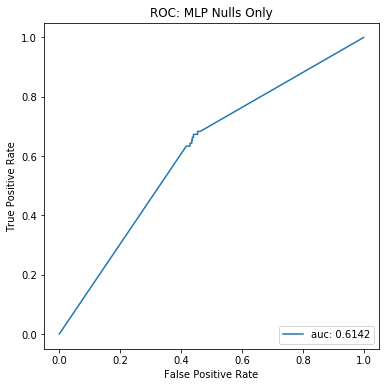

In [440]:
# This plots the ROC curve for the model.
roc_plot(model=mlp_nullsonly, x_test=Xtest_nullsonly,
        y_test=Ytest_nullsonly,title="ROC: MLP Nulls Only")

### MLP Model One Hot

In [395]:
# This comes from Reference 7 in References.
n_epochs = 100
size_of_batch = 50
stochastic = SGD(lr=0.001)
nad = Nadam()
RMS = RMSprop()

# This builds the MLP model for One Hot.
mlp_onehot = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                             first_dense=64,
                             second_dense=32,
                             third_dense=16,
                            hidden_act='relu',
                            out_act='sigmoid',
                            x=Xtrain_onehot)

In [396]:
# This compiles the MLP model for the One Hot data.
# This comes from Reference 13 in References.
mlp_onehot.compile(loss='binary_crossentropy',
              optimizer= stochastic,
              metrics=['accuracy'])

In [397]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 6 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.mlp_onehot.hdf5',
                             verbose=1, save_best_only=True)

In [398]:
# This fits the model and runs it for 100 epochs.
mlp_onehot.fit(Xtrain_onehot, Ytrain_onehot, validation_split=0.20,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = [checkpoint], verbose=1)

Train on 45858 samples, validate on 11465 samples
Epoch 1/100
45858/45858 [==============================] - 10s 222us/step - loss: 0.8830 - acc: 0.5230 - val_loss: 0.7933 - val_acc: 0.7262

Epoch 00001: val_loss improved from inf to 0.79333, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 2/100
45858/45858 [==============================] - 5s 113us/step - loss: 0.8345 - acc: 0.5857 - val_loss: 0.7752 - val_acc: 0.7940

Epoch 00002: val_loss improved from 0.79333 to 0.77520, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 3/100
45858/45858 [==============================] - 5s 112us/step - loss: 0.8141 - acc: 0.6359 - val_loss: 0.7637 - val_acc: 0.7908

Epoch 00003: val_loss improved from 0.77520 to 0.76375, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 4/100
45858/45858 [==============================] - 5s 114us/step - loss: 0.7964 - acc: 0.6778 - val_loss: 0.7537 - val_acc: 0.7722

Epoch 00004: val_loss improved from 0.76375 to 0.75

45858/45858 [==============================] - 10s 211us/step - loss: 0.6346 - acc: 0.7903 - val_loss: 0.5721 - val_acc: 0.8172

Epoch 00033: val_loss improved from 0.57531 to 0.57212, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 34/100
45858/45858 [==============================] - 8s 185us/step - loss: 0.6301 - acc: 0.7953 - val_loss: 0.5704 - val_acc: 0.8200

Epoch 00034: val_loss improved from 0.57212 to 0.57037, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 35/100
45858/45858 [==============================] - 9s 206us/step - loss: 0.6296 - acc: 0.7930 - val_loss: 0.5649 - val_acc: 0.8222

Epoch 00035: val_loss improved from 0.57037 to 0.56490, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 36/100
45858/45858 [==============================] - 9s 205us/step - loss: 0.6252 - acc: 0.7955 - val_loss: 0.5624 - val_acc: 0.8233

Epoch 00036: val_loss improved from 0.56490 to 0.56239, saving model to saved_models/weights.best.mlp_oneh

45858/45858 [==============================] - 6s 127us/step - loss: 0.5186 - acc: 0.8317 - val_loss: 0.4526 - val_acc: 0.8541

Epoch 00097: val_loss improved from 0.45384 to 0.45257, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 98/100
45858/45858 [==============================] - 6s 127us/step - loss: 0.5197 - acc: 0.8326 - val_loss: 0.4521 - val_acc: 0.8546

Epoch 00098: val_loss improved from 0.45257 to 0.45207, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 99/100
45858/45858 [==============================] - 6s 126us/step - loss: 0.5182 - acc: 0.8318 - val_loss: 0.4504 - val_acc: 0.8550

Epoch 00099: val_loss improved from 0.45207 to 0.45045, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 100/100
45858/45858 [==============================] - 6s 126us/step - loss: 0.5159 - acc: 0.8333 - val_loss: 0.4500 - val_acc: 0.8556

Epoch 00100: val_loss improved from 0.45045 to 0.44999, saving model to saved_models/weights.best.mlp_oneh

In [399]:
# This loads the best weights from the model.
# This comes from Reference 6 in References.
mlp_onehot.load_weights('saved_models/weights.best.mlp_onehot.hdf5')

In [400]:
# This prints the accuracy of the model.
# This comes from Reference 9 in References.
score = mlp_onehot.evaluate(Xtest_onehot, Ytest_onehot, verbose=0)
accuracy = 100*score[1]
print('Test acuracy: %.4f%%' %accuracy)

Test acuracy: 68.4140%


In [401]:
# This prints the AUC score for the model.
Ypred_onehot = mlp_onehot.predict(Xtest_onehot)
ROC_mlp_onehot = roc_auc_score(Ytest_onehot, Ypred_onehot)
print("The AUC score for the model is %.4f." % ROC_mlp_onehot)

The AUC score for the model is 0.7289.


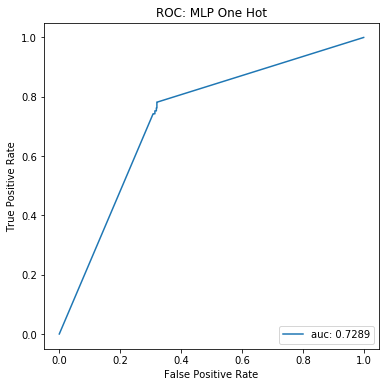

In [441]:
# This plots the ROC curve for the model.
roc_plot(model=mlp_onehot, x_test=Xtest_onehot,
        y_test=Ytest_onehot,title="ROC: MLP One Hot")

### MLP Model Sum

In [388]:
# This comes from Reference 7 in References.
n_epochs = 100
size_of_batch = 50
stochastic = SGD(lr=0.001)
nad = Nadam()
RMS = RMSprop()

# This builds the MLP model for SUM.
mlp_sum = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                             first_dense=32,
                             second_dense=16,
                             third_dense=8,
                            hidden_act='relu',
                            out_act='sigmoid',
                            x=Xtrain_sum)

In [389]:
# This compiles the MLP model for the SUM data.
# This comes from Reference 13 in References.
mlp_sum.compile(loss='binary_crossentropy',
              optimizer= stochastic,
              metrics=['accuracy'])

In [390]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 6 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.mlp_sum.hdf5',
                             verbose=1, save_best_only=True)

In [391]:
# This fits the model and runs it for 100 epochs.
mlp_sum.fit(Xtrain_sum, Ytrain_sum, validation_split=0.20,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = [checkpoint], verbose=1)

Train on 45858 samples, validate on 11465 samples
Epoch 1/100
45858/45858 [==============================] - 9s 202us/step - loss: 0.7687 - acc: 0.5385 - val_loss: 0.7297 - val_acc: 0.6844

Epoch 00001: val_loss improved from inf to 0.72967, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 2/100
45858/45858 [==============================] - 5s 101us/step - loss: 0.7535 - acc: 0.5654 - val_loss: 0.7168 - val_acc: 0.6913

Epoch 00002: val_loss improved from 0.72967 to 0.71679, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 3/100
45858/45858 [==============================] - 5s 101us/step - loss: 0.7441 - acc: 0.5816 - val_loss: 0.7069 - val_acc: 0.6928

Epoch 00003: val_loss improved from 0.71679 to 0.70694, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 4/100
45858/45858 [==============================] - 5s 100us/step - loss: 0.7390 - acc: 0.5955 - val_loss: 0.6996 - val_acc: 0.6940

Epoch 00004: val_loss improved from 0.70694 to 0.69959, savin

45858/45858 [==============================] - 5s 115us/step - loss: 0.6671 - acc: 0.6693 - val_loss: 0.6250 - val_acc: 0.7246

Epoch 00066: val_loss improved from 0.62578 to 0.62499, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 67/100
45858/45858 [==============================] - 5s 115us/step - loss: 0.6670 - acc: 0.6681 - val_loss: 0.6243 - val_acc: 0.7267

Epoch 00067: val_loss improved from 0.62499 to 0.62425, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 68/100
45858/45858 [==============================] - 5s 115us/step - loss: 0.6655 - acc: 0.6723 - val_loss: 0.6229 - val_acc: 0.7270

Epoch 00068: val_loss improved from 0.62425 to 0.62293, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 69/100
45858/45858 [==============================] - 5s 115us/step - loss: 0.6669 - acc: 0.6726 - val_loss: 0.6223 - val_acc: 0.7273

Epoch 00069: val_loss improved from 0.62293 to 0.62228, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch

45858/45858 [==============================] - 5s 118us/step - loss: 0.6489 - acc: 0.6876 - val_loss: 0.6027 - val_acc: 0.7471

Epoch 00099: val_loss improved from 0.60309 to 0.60270, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 100/100
45858/45858 [==============================] - 5s 112us/step - loss: 0.6499 - acc: 0.6904 - val_loss: 0.6023 - val_acc: 0.7477

Epoch 00100: val_loss improved from 0.60270 to 0.60233, saving model to saved_models/weights.best.mlp_sum.hdf5


In [392]:
# This loads the best weights from the model.
# This comes from Reference 6 in References.
mlp_sum.load_weights('saved_models/weights.best.mlp_sum.hdf5')

In [393]:
# This prints the accuracy of the model.
# This comes from Reference 9 in References.
score = mlp_sum.evaluate(Xtest_sum, Ytest_sum, verbose=0)
accuracy = 100*score[1]
print('Test acuracy: %.4f%%' %accuracy)

Test acuracy: 74.1569%


In [394]:
# This prints the AUC score for the model.
Ypred_sum = mlp_sum.predict(Xtest_sum)
ROC_mlp_sum = roc_auc_score(Ytest_sum, Ypred_sum)
print("The AUvC score for the model is %.4f." % ROC_mlp_sum)

The AUC score for the model is 0.7452.


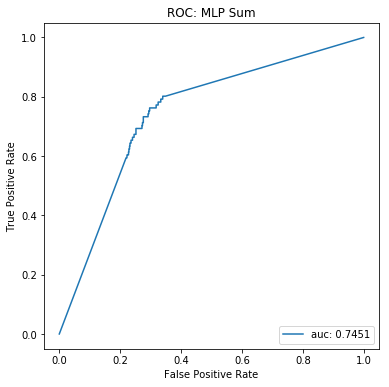

In [442]:
# This plots the ROC curve for the model.
roc_plot(model=mlp_sum, x_test=Xtest_sum,
        y_test=Ytest_sum,title="ROC: MLP Sum")

<a id='Conclusion'></a>
## Conclusion
It's difficult to interpret the results of the models, because one has to make an assumption about null values. On the one hand, null values are very important indicators that a company could be willingly not reporting values to hide financial difficulties within the company. However, when null values are imputed into the training dataset, assumptions about these values must be made; in other words, the training set is no longer simply processing raw data, it is also processing the assumptions about the null values.

AUC scores were used to assess the performance of the Logistic Regression and MLP models. Different datasets were used on these models, one with no null variables(the "No Nulls" dataset), one with imputed null variables(the "Nulls Only" dataset), one with imputed null variables and a dummy variable for each column (the "One Hot" dataset), indicating whether a given value in the column was null, and a dataset with imputed values and a counting variable that counted the number of null values in a given row of data (the "Sum" dataset). The logistic regression models showed the following AUC scores: 0.3675 for the "No Nulls" dataset, 0.6903 for "Nulls Only", 0.6872 for "One Hot", and "0.6822" for "Sum." The MLP AUC scores were as follows: 0.5504 for the "No Nulls" dataset, 0.6142 for "Nulls Only", 0.7289 for "One Hot", and 0.7452 for "Sum." All the MLPs outperformed the Logistic Regression benchmark models with the exception of the MLP model for "Nulls Only".

There's no correct answer in addressing whether a financial institution should use the MLP models. While the MLP models on the "One Hot" and "Sum" datasets make correct predictions over 70% of the time, a penalty should be added to these models. The difference between the MLP "Nulls Only" and the MLP "NO Null's" AUC scores should be used to subtract from the AUC score of both the "One Hot" and "Sum" MLP models. Models with imputed null values have overly optimistic biases due to the assumptions made about the null values; these models do not simply operate on raw data. Subtracting the difference is a way to penalize the model for the bias. The revised scores, using the difference of "Nulls Only" and "No Nulls" (0.0638), should be 0.6651, and 0.6814 for the MLP One Hot and Sum models respectively. Theoreticallly, a firm investing in Polish manufacturing companies could use these AUC scores to create hedges. Based upon these scores, no firm sould invest entirely long or short in a company, the AUC scores are not good enough to take those risks.

<a id='references'></a>
## References

1. https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
3. https://towardsdatascience.com/time-series-nested-cross-validation-76adba623eb9
4. https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/
5. https://keras.io/getting-started/sequential-model-guide/
6. Udacity Machine Learning Engineer Nanodegree Program, Semester 2, Brian Campbell - Dog Breed Classifier Project
7. https://keras.io/getting-started/sequential-model-guide/
8. https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.size.html
9. https://keras.io/models/sequential/
10. https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
11. https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
12. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure